In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('../../Datasets/cases/Human_Resources_Analytics/HR_comma_sep.csv')
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [75]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [77]:
X = df.drop(['left'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['left']


In [47]:
y.value_counts()

left
0    11428
1     3567
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)


c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_pred_prob

array([[0.61099181, 0.38900819],
       [0.61344312, 0.38655688],
       [0.5404661 , 0.4595339 ],
       ...,
       [0.94840852, 0.05159148],
       [0.9446712 , 0.0553288 ],
       [0.78286529, 0.21713471]], shape=(4499, 2))

In [99]:
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7983996443654146

## argmax used when we dont use lr.pred and we use lr.pred_prob
will give index for max value, argmin for index of min

1d data

In [52]:
a = np.array([9, 4, 5, 89, 23, 45])
a.argmax(), a.max()

(np.int64(3), np.int64(89))

In [53]:
a.argmin(), a.min()

(np.int64(1), np.int64(4))

2d data

In [58]:
a = np.array([[9, 19],
              [34, 2],
              [56, 46],
              [102, 200]])

In [ ]:
a.argmax() # will give index of max value for whole array, but we want for each list in the 2d array

np.int64(7)

In [ ]:
a.argmax(axis=1) # this gives index for each row

array([1, 0, 0, 1])

In [ ]:
y_pred = y_pred_prob.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], shape=(4499,))

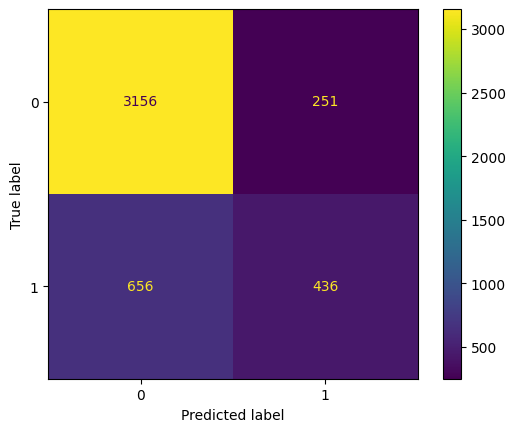

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [73]:
accuracy_score(y_test, y_pred)

0.7983996443654146

In [79]:
y.value_counts(normalize=True)*100

left
0    76.212071
1    23.787929
Name: proportion, dtype: float64

In [80]:
y_train.value_counts(normalize=True)*100

left
0    76.419588
1    23.580412
Name: proportion, dtype: float64

In [81]:
y_test.value_counts(normalize=True)*100

left
0    75.72794
1    24.27206
Name: proportion, dtype: float64

SO THEY HAVE SIMILAR TRAIN TEST SPLIT. COINCIDENTLY. SOMETIMES THE SPLIT PERCENTAGE IS NOT MAINTAINED. TO ENSURE PERCENTAGE IS MAINTAINED ->

THAT IS "STRATIFICATION"

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [124]:
y_test.value_counts(normalize=True)*100

left
0    76.216937
1    23.783063
Name: proportion, dtype: float64

In [125]:
y_train.value_counts(normalize=True)*100

left
0    76.209985
1    23.790015
Name: proportion, dtype: float64

AFTER STRATIFICATION, RE-RUN THE LOGISTIC REGRESSION AND CHECK IF THE ACCURACY SCORE HAS DECREASE

In [ ]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_pred_prob = lr.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred_prob)

0.8008446321404756

CALCULATE ACCURACY SCORE WITH SAGA AS SOLVER.

In [ ]:
scores = []
penalties = ['l1','l2','elasticnet',None]
solver = 'saga'

for i in penalties:
    lr = LogisticRegression(solver=solver, penalty=i, l1_ratio=0.5)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append([i, accuracy_score(y_test,y_pred)])
df_scores = pd.DataFrame(scores, columns=['Penalty','Score'])
df_scores.sort_values('Score', ascending=False)



In [140]:
scores = []
penalties = ['l2', None]
solver = 'newton-cg'
# ['newton-cg', 'newton-cholesky']

# for s in solver:
for i in penalties:
    lr = LogisticRegression(solver=solver, penalty=i, l1_ratio=0.5)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append([i, accuracy_score(y_test, y_pred)])


df_scores = pd.DataFrame(scores, columns=['Penality', 'Score'])
df_scores.sort_values('Score', ascending=False)

c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


,Penality,Score
0,l2,0.799733
1,None,0.799289


In [141]:
scores = []
penalties = ['l2', None]
solver = ['newton-cg', 'sag', 'newton-cholesky', 'lbfgs']
# ['newton-cg', 'newton-cholesky']

for s in solver:
    for i in penalties:
        lr = LogisticRegression(solver=s, penalty=i, l1_ratio=0.5)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([i, s, accuracy_score(y_test, y_pred)])



df_scores = pd.DataFrame(scores, columns=['Penality','Solver', 'Score'])
df_scores.sort_values('Score', ascending=False)

c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warni

,Penality,Solver,Score
7,None,lbfgs,0.809291
6,l2,lbfgs,0.807735
0,l2,newton-cg,0.799733
1,None,newton-cg,0.799289
5,None,newton-cholesky,0.799066
4,l2,newton-cholesky,0.799066
2,l2,sag,0.750834
3,None,sag,0.750611
